In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.613365,0.562665,2.024701,-0.099879,-0.784039,0
1,-1.476331,-1.840278,1.800857,1.305316,-2.279088,1
2,0.110392,-0.291353,1.410383,-2.853339,-1.561535,0
3,-0.797855,-0.550244,-0.922554,0.918002,0.137630,1
4,-1.388257,-1.709317,1.455218,1.672142,-1.208957,1


In [ ]:
# for row sampling

def sample_row(df, percent):
    return df.sample(int(percent * df.shape[0]), replace=True)


In [ ]:
# for column(feature) sampling

import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df


In [ ]:
# for combined sampling

def combined_sampling(df, row_percent, col_percent):
  new_df=sample_row(df, row_percent)
  return sample_features(new_df, col_percent)

### using row sampling

In [ ]:
df1 = sample_row(df,0.2)


In [ ]:
df2 = sample_row(df,0.2)



In [ ]:
df3=sample_row(df,0.2)

In [ ]:

print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [ ]:
df3

,col1,col2,col3,col4,col5,target
55,0.204189,0.228545,2.128444,-0.624278,-1.492285,0
4,-1.388257,-1.709317,1.455218,1.672142,-1.208957,1
69,2.653776,2.407840,0.581110,-0.431806,-1.530517,0
75,-1.089966,-0.962256,2.705998,-1.983314,-0.882142,0
94,-0.831660,-0.456912,1.474108,0.540031,-1.369163,1
3,-0.797855,-0.550244,-0.922554,0.918002,0.137630,1
51,-2.225648,-1.951935,0.437538,1.938137,-2.144445,1
61,-2.390061,-1.813307,3.920077,0.070125,-1.590446,1
6,-0.432892,-0.654239,1.180258,-3.893327,-2.989546,0
69,2.653776,2.407840,0.581110,-0.431806,-1.530517,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:


from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 0.015\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

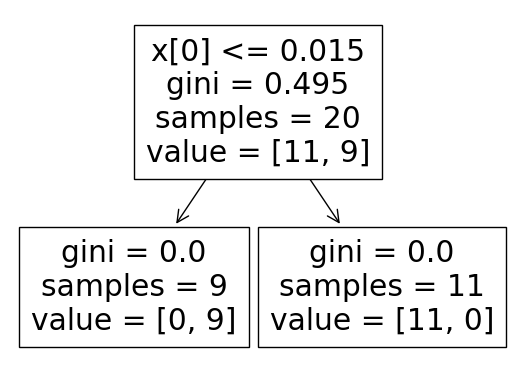

In [ ]:


plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.193\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6, 0.5, 'x[1] <= 0.05\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

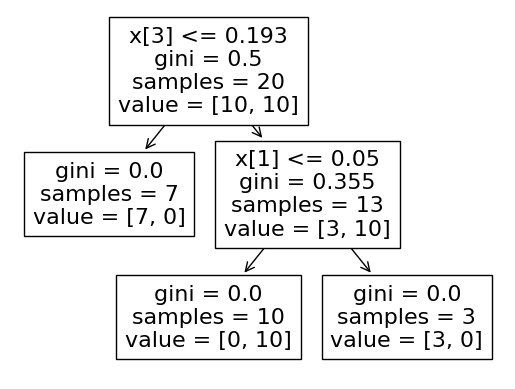

In [ ]:

plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[0] <= 0.125\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.4, 0.5, 'x[3] <= -1.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

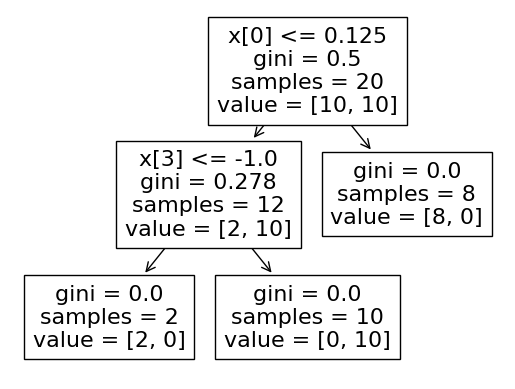

In [ ]:


plot_tree(clf3)

In [ ]:

clf1.predict(np.array([-0.432892,	-0.654239,	1.180258,	-3.893327,	-2.989546]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-0.432892,	-0.654239,	1.180258,	-3.893327,	-2.989546]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([-0.432892,	-0.654239,	1.180258,	-3.893327,	-2.989546]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## using feature sampling

In [ ]:
df4=sample_features(df, 0.5)

<ipython-input-58-244615ad4198>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df5=sample_features(df, 0.5)

<ipython-input-58-244615ad4198>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df6=sample_features(df, 0.5)

<ipython-input-58-244615ad4198>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
print(df4.columns)
print(df5.columns)
print(df6.columns)

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [ ]:
df5

,col2,col3,target
0,0.562665,2.024701,0
1,-1.840278,1.800857,1
2,-0.291353,1.410383,0
3,-0.550244,-0.922554,1
4,-1.709317,1.455218,1
...,...,...,...
95,-2.087160,0.895890,1
96,-1.092573,1.478800,1
97,-0.176495,4.624312,0
98,-1.785999,0.313873,1


In [ ]:
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [ ]:
clf4.fit(df4.iloc[:, 0:2], df4.iloc[:, -1])
clf5.fit(df5.iloc[:, 0:2], df5.iloc[:, -1])
clf6.fit(df6.iloc[:, 0:2], df6.iloc[:, -1])

DecisionTreeClassifier()

In [ ]:


from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.9583333333333334, 'x[1] <= -0.039\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.16666666666666666, 0.875, 'x[0] <= -1.642\ngini = 0.139\nsamples = 40\nvalue = [37, 3]'),
 Text(0.1111111111111111, 0.7916666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.7916666666666666, 'x[0] <= -0.266\ngini = 0.097\nsamples = 39\nvalue = [37, 2]'),
 Text(0.16666666666666666, 0.7083333333333334, 'x[0] <= -0.408\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.1111111111111111, 0.625, 'x[1] <= -0.193\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.05555555555555555, 0.5416666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.16666666666666666, 0.5416666666666666, 'x[0] <= -0.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.22

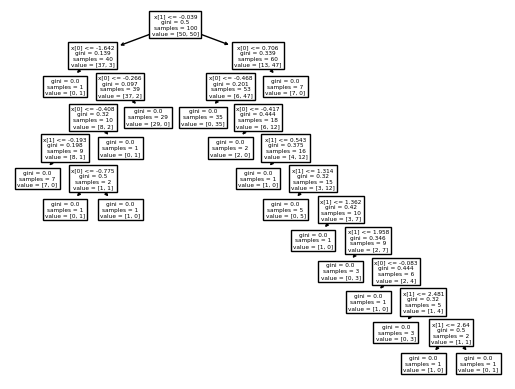

In [ ]:

plot_tree(clf4)

[Text(0.5769230769230769, 0.9375, 'x[0] <= 0.136\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4230769230769231, 0.8125, 'x[0] <= -1.253\ngini = 0.346\nsamples = 63\nvalue = [14, 49]'),
 Text(0.34615384615384615, 0.6875, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.5, 0.6875, 'x[1] <= 0.808\ngini = 0.46\nsamples = 39\nvalue = [14, 25]'),
 Text(0.4230769230769231, 0.5625, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.5769230769230769, 0.5625, 'x[0] <= -0.37\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(0.38461538461538464, 0.4375, 'x[1] <= 2.078\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.23076923076923078, 0.3125, 'x[1] <= 1.319\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.15384615384615385, 0.1875, 'x[1] <= 1.075\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.307692307692

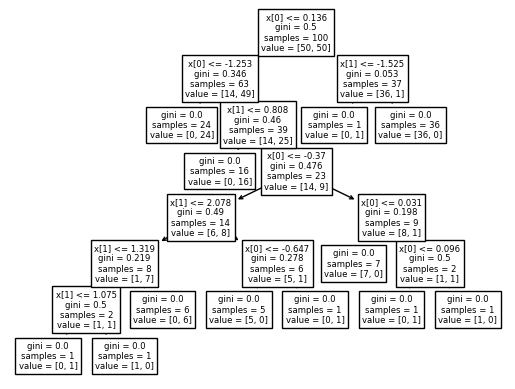

In [ ]:

plot_tree(clf5)

[Text(0.4318181818181818, 0.9666666666666667, 'x[0] <= -0.469\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.22727272727272727, 0.9, 'x[1] <= 1.27\ngini = 0.24\nsamples = 43\nvalue = [6, 37]'),
 Text(0.13636363636363635, 0.8333333333333334, 'x[0] <= -1.267\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.09090909090909091, 0.7666666666666667, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.18181818181818182, 0.7666666666666667, 'x[0] <= -1.222\ngini = 0.332\nsamples = 19\nvalue = [4, 15]'),
 Text(0.13636363636363635, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.22727272727272727, 0.7, 'x[0] <= -0.843\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.18181818181818182, 0.6333333333333333, 'x[0] <= -0.882\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.13636363636363635, 0.5666666666666667, 'x[1] <= -0.705\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.09090909090909091, 0.5, 'x[1] <= -1.1\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 

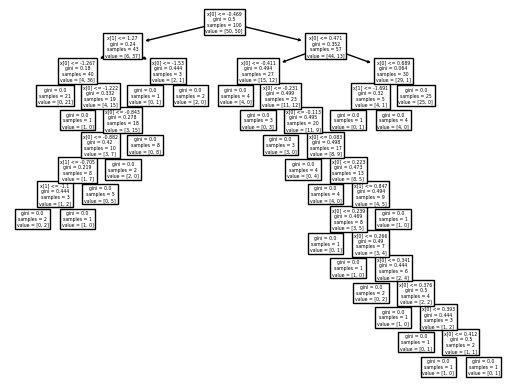

In [ ]:

plot_tree(clf6)

In [ ]:
clf4.predict(np.array([-2.087160,	0.895890	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf5.predict(np.array([-2.087160,	0.895890	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf6.predict(np.array([-2.087160,	0.895890	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## using combined

In [ ]:
df7=combined_sampling(df, 0.5, 0.5)

<ipython-input-58-244615ad4198>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df8=combined_sampling(df, 0.5, 0.5)

<ipython-input-58-244615ad4198>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df9=combined_sampling(df, 0.5, 0.5)

<ipython-input-58-244615ad4198>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
print(df7.columns)
print(df8.columns)
print(df9.columns)

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')


In [ ]:
df7

,col1,col4,target
77,0.222805,-0.303564,0
2,0.110392,-2.853339,0
6,-0.432892,-3.893327,0
28,0.651570,-1.811887,0
2,0.110392,-2.853339,0
55,0.204189,-0.624278,0
89,-0.890559,-0.524605,0
33,0.253708,-1.205865,0
78,1.109163,-1.357958,0
58,-2.607909,0.677032,1


In [ ]:


from sklearn.tree import DecisionTreeClassifier
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()

In [ ]:
clf7.fit(df7.iloc[:, 0:2], df7.iloc[:, -1])
clf8.fit(df8.iloc[:, 0:2], df8.iloc[:, -1])
clf9.fit(df9.iloc[:, 0:2], df9.iloc[:, -1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.015\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.5, 0.625, 'x[0] <= 0.128\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 2.059\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

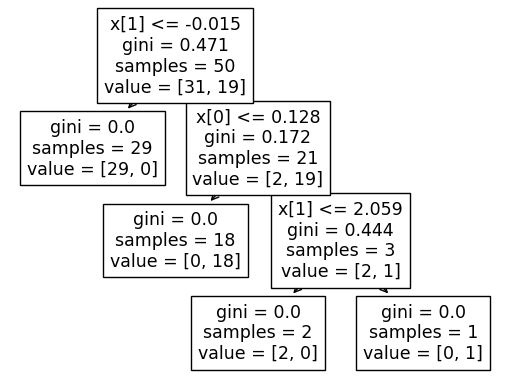

In [ ]:
plot_tree(clf7)

[Text(0.5, 0.9, 'x[1] <= 0.139\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 1.075\ngini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.5, 0.5, 'x[1] <= -1.125\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= -0.556\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]')]

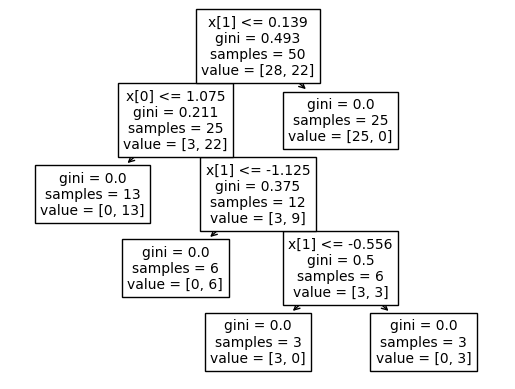

In [ ]:
plot_tree(clf8)

[Text(0.38461538461538464, 0.9615384615384616, 'x[0] <= -2.121\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.23076923076923078, 0.8846153846153846, 'x[1] <= 1.214\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.15384615384615385, 0.8076923076923077, 'x[1] <= 0.418\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.07692307692307693, 0.7307692307692307, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.23076923076923078, 0.7307692307692307, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3076923076923077, 0.8076923076923077, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5384615384615384, 0.8846153846153846, 'x[1] <= -0.265\ngini = 0.461\nsamples = 36\nvalue = [23, 13]'),
 Text(0.46153846153846156, 0.8076923076923077, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6153846153846154, 0.8076923076923077, 'x[1] <= 2.432\ngini = 0.404\nsamples = 32\nvalue = [23, 9]'),
 Text(0.38461538461538464, 0.7307692307692307, 'x[1] <= 1.475\ngini = 0.311\nsamples = 26

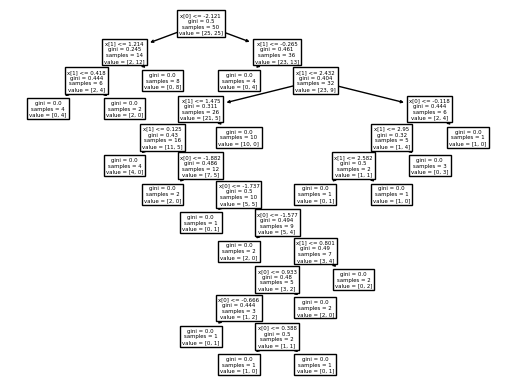

In [ ]:
plot_tree(clf9)

In [ ]:
clf7.predict(np.array([0.403943,	-1.137962	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf8.predict(np.array([0.403943,	-1.137962	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf9.predict(np.array([0.403943,	-1.137962	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])